In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.
Taula 'BANK_marketing211024' carregada correctament.
Taula 'BANK_marketing_backup_211024' carregada correctament.


In [7]:
df_BANK_marketing=df['BANK_marketing211024']

In [8]:
df_BANK_marketing.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


In [12]:
# Función para asignar el año basado en el índice
def assign_year(index):
    if index <= 1090:
        return 2008
    elif 1091 <= index <= 3056:
        return 2009
    elif 3057 <= index <= 4120:
        return 2010
    else:
        return None

# Aplicamos la función para generar la columna 'year'
df_BANK_marketing['year'] = df_BANK_marketing.index.map(assign_year)

# Mostrar el DataFrame con la nueva columna 'year'
print(df_BANK_marketing[['id', 'year']])


          id    year
0          1  2008.0
1          2  2008.0
2          3  2008.0
3          4  2008.0
4          5  2008.0
...      ...     ...
26158  26379     NaN
26159  26380     NaN
26160  26381     NaN
26161  26382     NaN
26162  26383     NaN

[26163 rows x 2 columns]


In [13]:
df_BANK_marketing.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,year
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2008.0
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2008.0
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2008.0
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,2008.0
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,2008.0


In [14]:
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26163 entries, 0 to 26162
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         26163 non-null  int64  
 1   age        26163 non-null  int64  
 2   job        26163 non-null  object 
 3   marital    26163 non-null  object 
 4   education  26163 non-null  object 
 5   default    26163 non-null  int64  
 6   balance    26163 non-null  int64  
 7   housing    26163 non-null  int64  
 8   loan       26163 non-null  int64  
 9   contact    26163 non-null  object 
 10  day        26163 non-null  int64  
 11  month      26163 non-null  object 
 12  duration   26163 non-null  int64  
 13  campaign   26163 non-null  int64  
 14  pdays      26163 non-null  int64  
 15  previous   26163 non-null  int64  
 16  poutcome   26163 non-null  object 
 17  deposit    26163 non-null  int64  
 18  year       4121 non-null   float64
dtypes: float64(1), int64(12), object(6)
memory usa

In [15]:
# Convertir la columna 'year' a formato integer, reemplazando los valores None por -1
df_BANK_marketing['year'] = df_BANK_marketing['year'].fillna(-1).astype(int)

# Mostrar el DataFrame actualizado
print(df_BANK_marketing[['id', 'year']])


          id  year
0          1  2008
1          2  2008
2          3  2008
3          4  2008
4          5  2008
...      ...   ...
26158  26379    -1
26159  26380    -1
26160  26381    -1
26161  26382    -1
26162  26383    -1

[26163 rows x 2 columns]


In [16]:
# Función para calcular el día de la semana sólo cuando 'year' no sea -1
def get_weekday_with_year(row):
    if row['year'] == -1:
        return None
    date_str = f"{row['day']}-{row['year']}-{row['month']}"
    date_obj = datetime.strptime(date_str, '%d-%Y-%b')
    return date_obj.strftime('%A')

# Aplicamos la función al DataFrame
df_BANK_marketing['weekday'] = df_BANK_marketing.apply(get_weekday_with_year, axis=1)

# Mostrar el DataFrame actualizado con la nueva columna 'weekday'
print(df_BANK_marketing[['id', 'year', 'day', 'month', 'weekday']])


          id  year  day month weekday
0          1  2008    5   may  Monday
1          2  2008    5   may  Monday
2          3  2008    5   may  Monday
3          4  2008    5   may  Monday
4          5  2008    5   may  Monday
...      ...   ...  ...   ...     ...
26158  26379    -1    2   aug    None
26159  26380    -1   18   aug    None
26160  26381    -1   22   apr    None
26161  26382    -1   12   jun    None
26162  26383    -1   19   aug    None

[26163 rows x 5 columns]


In [17]:
df_BANK_marketing.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,year,weekday
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2008,Monday
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2008,Monday
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2008,Monday
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,2008,Monday
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,2008,Monday


# Duración Media de las Llamadas por Día de la Semana

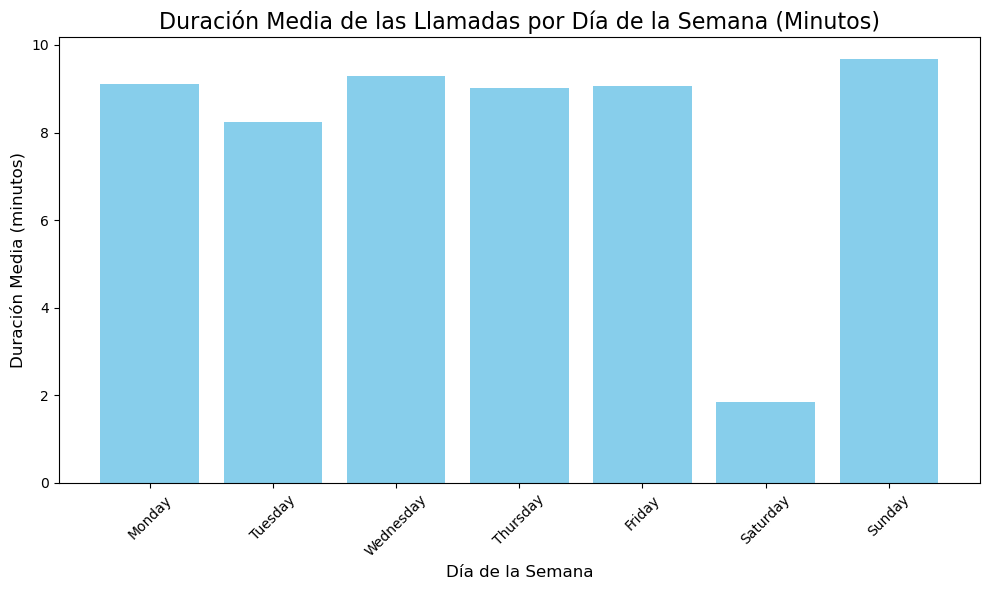

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la duración de segundos a minutos
avg_duration_by_weekday['duration'] = avg_duration_by_weekday['duration'] / 60

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar el DataFrame basado en el orden de los días de la semana
avg_duration_by_weekday['weekday'] = pd.Categorical(avg_duration_by_weekday['weekday'], categories=weekday_order, ordered=True)
avg_duration_by_weekday = avg_duration_by_weekday.sort_values('weekday')

# Crear un gráfico de barras para mostrar la duración media de las llamadas por día de la semana en minutos
plt.figure(figsize=(10,6))
plt.bar(avg_duration_by_weekday['weekday'], avg_duration_by_weekday['duration'], color='skyblue')

# Añadir etiquetas y título
plt.title('Duración Media de las Llamadas por Día de la Semana (Minutos)', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Duración Media (minutos)', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


     weekday  total_contacts  successful_contacts  conversion_rate
1     Monday             766                  766              1.0
5    Tuesday             771                  771              1.0
6  Wednesday             846                  846              1.0
4   Thursday             960                  960              1.0
0     Friday             771                  771              1.0
2   Saturday               2                    2              1.0
3     Sunday               5                    5              1.0


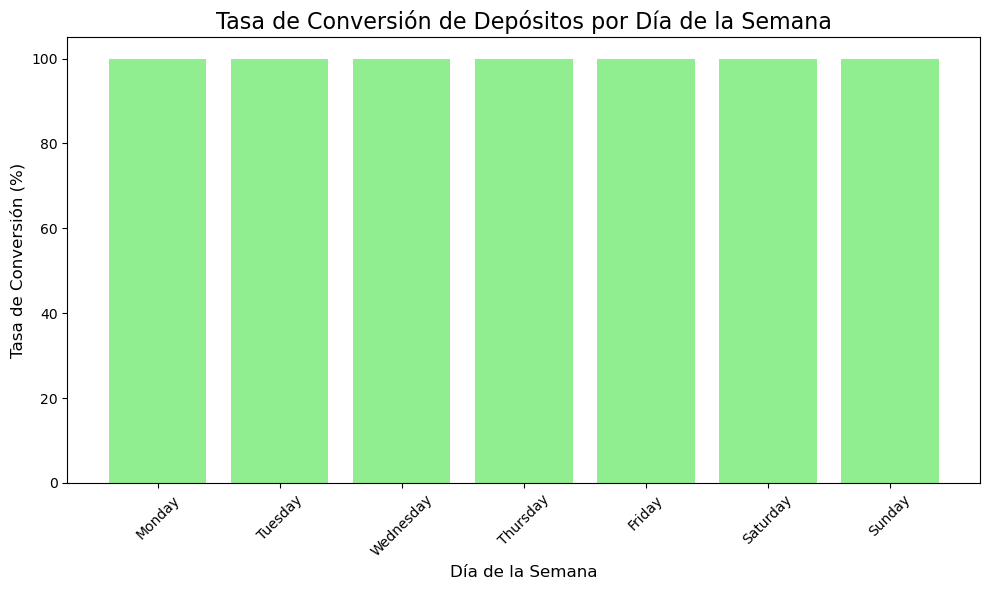

In [27]:
# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = df['BANK_marketing211024']  # Ejemplo si necesitas cargarlo nuevamente

# Agrupar por día de la semana y calcular la tasa de conversión (porcentaje de depósitos exitosos)
conversion_rate_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    total_contacts=('id', 'count'),
    successful_contacts=('deposit', 'sum')  # Como deposit es booleano, sumamos para contar los True
).reset_index()

# Calcular la tasa de conversión
conversion_rate_by_weekday['conversion_rate'] = conversion_rate_by_weekday['successful_contacts'] / conversion_rate_by_weekday['total_contacts']

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conversion_rate_by_weekday['weekday'] = pd.Categorical(conversion_rate_by_weekday['weekday'], categories=weekday_order, ordered=True)
conversion_rate_by_weekday = conversion_rate_by_weekday.sort_values('weekday')

# Mostrar el DataFrame con la tasa de conversión por día de la semana
print(conversion_rate_by_weekday)

# Crear el gráfico de barras para mostrar la tasa de conversión por día de la semana
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(conversion_rate_by_weekday['weekday'], conversion_rate_by_weekday['conversion_rate'] * 100, color='lightgreen')

# Añadir etiquetas y título
plt.title('Tasa de Conversión de Depósitos por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Tasa de Conversión (%)', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = df['BANK_marketing211024']  # Ejemplo si necesitas cargarlo nuevamente

# Agrupar los datos por día de la semana y tipo de contacto (telephone o cellular)
contacts_by_type_weekday = df_BANK_marketing.groupby(['weekday', 'contact']).agg(
    total_contacts=('id', 'count')
).reset_index()

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
contacts_by_type_weekday['weekday'] = pd.Categorical(contacts_by_type_weekday['weekday'], categories=weekday_order, ordered=True)
contacts_by_type_weekday = contacts_by_type_weekday.sort_values(['weekday', 'contact'])

# Mostrar el DataFrame con la cantidad de llamadas por día de la semana y tipo de contacto
print(contacts_by_type_weekday)


      weekday    contact  total_contacts
3      Monday   cellular             631
4      Monday  telephone              61
5      Monday    unknown              74
12    Tuesday   cellular             640
13    Tuesday  telephone              66
14    Tuesday    unknown              65
15  Wednesday   cellular             697
16  Wednesday  telephone              64
17  Wednesday    unknown              85
9    Thursday   cellular             802
10   Thursday  telephone              68
11   Thursday    unknown              90
0      Friday   cellular             617
1      Friday  telephone              55
2      Friday    unknown              99
6    Saturday    unknown               2
7      Sunday  telephone               1
8      Sunday    unknown               4


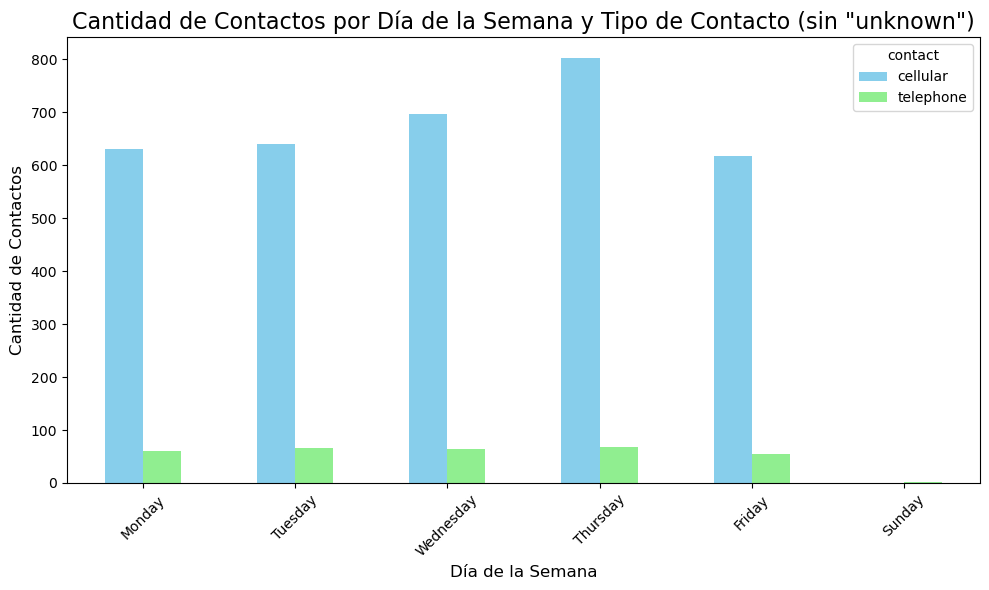

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = df['BANK_marketing211024']  # Ejemplo si necesitas cargarlo nuevamente

# Filtrar el DataFrame para ignorar los valores 'unknown' en la columna 'contact'
df_filtered = df_BANK_marketing[df_BANK_marketing['contact'] != 'unknown']

# Agrupar los datos por día de la semana y tipo de contacto (telephone o cellular)
contacts_by_type_weekday = df_filtered.groupby(['weekday', 'contact']).agg(
    total_contacts=('id', 'count')
).reset_index()

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
contacts_by_type_weekday['weekday'] = pd.Categorical(contacts_by_type_weekday['weekday'], categories=weekday_order, ordered=True)
contacts_by_type_weekday = contacts_by_type_weekday.sort_values(['weekday', 'contact'])

# Pivotar el DataFrame para que 'contact' sea el tipo de contacto (telephone o cellular) y cada uno sea una columna
contacts_by_type_pivot = contacts_by_type_weekday.pivot(index='weekday', columns='contact', values='total_contacts').fillna(0)

# Crear el gráfico de barras con barras separadas
contacts_by_type_pivot.plot(kind='bar', color=['skyblue', 'lightgreen'], figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Cantidad de Contactos por Día de la Semana y Tipo de Contacto (sin "unknown")', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Contactos', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
#Del sabado no obtenemos nada debido a que solo tiene valores unknown

# Balance Promedio por Día de la Semana

In [34]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar los datos por día de la semana y calcular el balance promedio de los clientes
balance_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    avg_balance=('balance', 'mean')
).reset_index()

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
balance_by_weekday['weekday'] = pd.Categorical(balance_by_weekday['weekday'], categories=weekday_order, ordered=True)
balance_by_weekday = balance_by_weekday.sort_values('weekday')

# Mostrar los resultados del balance promedio por día de la semana
print(balance_by_weekday)


     weekday  avg_balance
1     Monday  1838.193211
5    Tuesday  1639.753567
6  Wednesday  1768.726950
4   Thursday  1809.433333
0     Friday  1844.993515
2   Saturday  1730.500000
3     Sunday  2578.800000


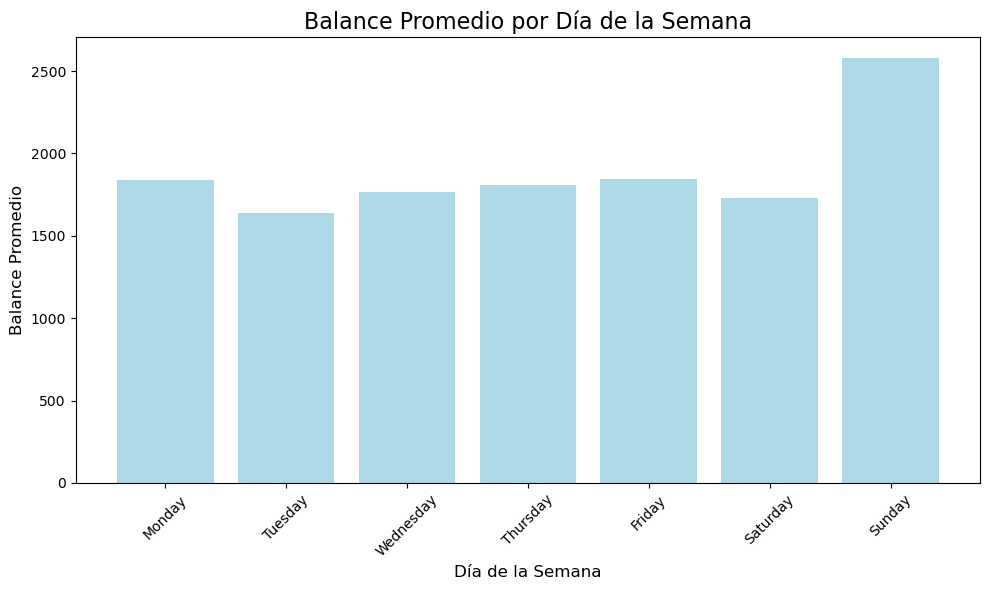

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar los datos por día de la semana y calcular el balance promedio de los clientes
balance_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    avg_balance=('balance', 'mean')
).reset_index()

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
balance_by_weekday['weekday'] = pd.Categorical(balance_by_weekday['weekday'], categories=weekday_order, ordered=True)
balance_by_weekday = balance_by_weekday.sort_values('weekday')

# Crear un gráfico de barras para mostrar el balance promedio por día de la semana
plt.figure(figsize=(10,6))
plt.bar(balance_by_weekday['weekday'], balance_by_weekday['avg_balance'], color='lightblue')

# Añadir etiquetas y título
plt.title('Balance Promedio por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Balance Promedio', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Porcentaje de Clientes con Vivienda o Préstamos por Día de la Semana

In [36]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Filtrar los datos para los registros que tienen 'Monday' en la columna 'weekday'
monday_data = df_BANK_marketing[df_BANK_marketing['weekday'] == 'Monday']

# Extraer los días específicos en los que cae lunes
unique_monday_days = monday_data['day'].unique()

# Mostrar los días únicos que caen en lunes
print(unique_monday_days)


[ 5 12 19 26  2  9 16 23  7 14 21 28  4 11 18 25 20 27 10 17 22 30  6 13
  1  8 15 24 31 29]


In [37]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Filtrar los datos para los registros que tienen 'Monday' en la columna 'weekday'
monday_data = df_BANK_marketing[df_BANK_marketing['weekday'] == 'Monday']

# Extraer los días, meses y años específicos en los que cae lunes
monday_dates = monday_data[['day', 'month', 'year']].drop_duplicates()

# Mostrar los días únicos que caen en lunes, junto con el mes y el año
print(monday_dates)


      day month  year
0       5   may  2008
36     12   may  2008
91     19   may  2008
135    26   may  2008
201     2   jun  2008
...   ...   ...   ...
4013   27   sep  2010
4034   11   oct  2010
4051   18   oct  2010
4075   25   oct  2010
4090    8   nov  2010

[98 rows x 3 columns]


In [38]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar por día de la semana y calcular la cantidad de clientes con o sin vivienda
housing_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    total_customers=('id', 'count'),
    housing_customers=('housing', lambda x: (x == 1).sum()),
    loan_customers=('loan', lambda x: (x == 1).sum())
).reset_index()

# Calcular el porcentaje de clientes con vivienda y con préstamos por día de la semana
housing_by_weekday['percent_housing'] = (housing_by_weekday['housing_customers'] / housing_by_weekday['total_customers']) * 100
housing_by_weekday['percent_loan'] = (housing_by_weekday['loan_customers'] / housing_by_weekday['total_customers']) * 100

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
housing_by_weekday['weekday'] = pd.Categorical(housing_by_weekday['weekday'], categories=weekday_order, ordered=True)
housing_by_weekday = housing_by_weekday.sort_values('weekday')

# Mostrar los resultados
print(housing_by_weekday[['weekday', 'percent_housing', 'percent_loan']])


     weekday  percent_housing  percent_loan
1     Monday        36.945170      9.791123
5    Tuesday        34.241245      9.338521
6  Wednesday        34.515366      8.865248
4   Thursday        35.520833      8.125000
0     Friday        40.985733     10.116732
2   Saturday         0.000000      0.000000
3     Sunday        20.000000      0.000000


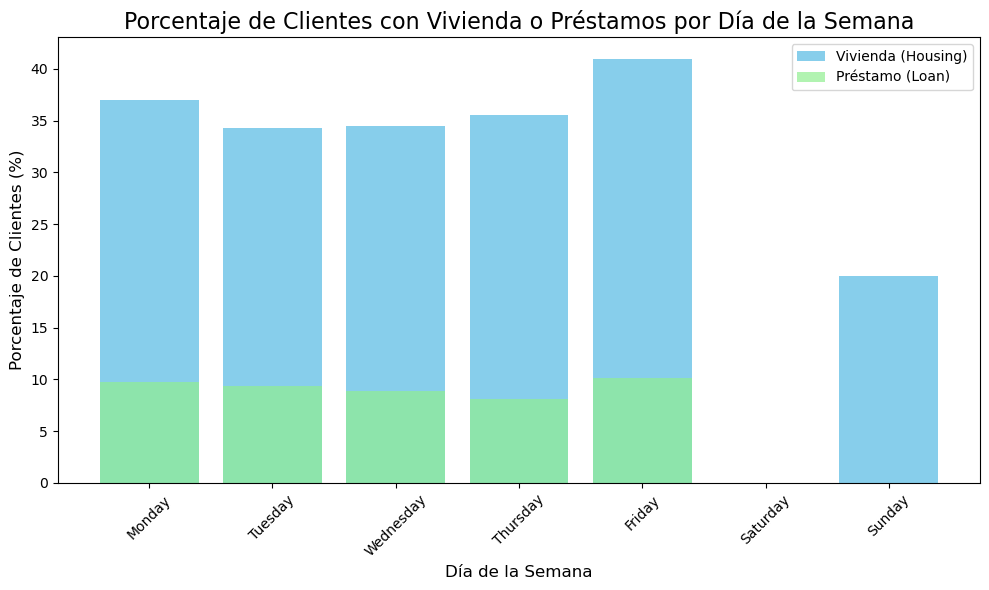

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar por día de la semana y calcular la cantidad de clientes con o sin vivienda
housing_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    total_customers=('id', 'count'),
    housing_customers=('housing', lambda x: (x == 1).sum()),
    loan_customers=('loan', lambda x: (x == 1).sum())
).reset_index()

# Calcular el porcentaje de clientes con vivienda y con préstamos por día de la semana
housing_by_weekday['percent_housing'] = (housing_by_weekday['housing_customers'] / housing_by_weekday['total_customers']) * 100
housing_by_weekday['percent_loan'] = (housing_by_weekday['loan_customers'] / housing_by_weekday['total_customers']) * 100

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
housing_by_weekday['weekday'] = pd.Categorical(housing_by_weekday['weekday'], categories=weekday_order, ordered=True)
housing_by_weekday = housing_by_weekday.sort_values('weekday')

# Crear un gráfico de barras para mostrar el porcentaje de clientes con vivienda y con préstamos por día de la semana
plt.figure(figsize=(10,6))

# Gráfico de barras para el porcentaje de clientes con vivienda (housing)
plt.bar(housing_by_weekday['weekday'], housing_by_weekday['percent_housing'], label='Vivienda (Housing)', color='skyblue')

# Gráfico de barras para el porcentaje de clientes con préstamos (loan)
plt.bar(housing_by_weekday['weekday'], housing_by_weekday['percent_loan'], label='Préstamo (Loan)', color='lightgreen', alpha=0.7)

# Añadir etiquetas y título
plt.title('Porcentaje de Clientes con Vivienda o Préstamos por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Porcentaje de Clientes (%)', fontsize=12)

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Porcentaje de Clientes con Vivienda o Préstamos por Día de la Semana

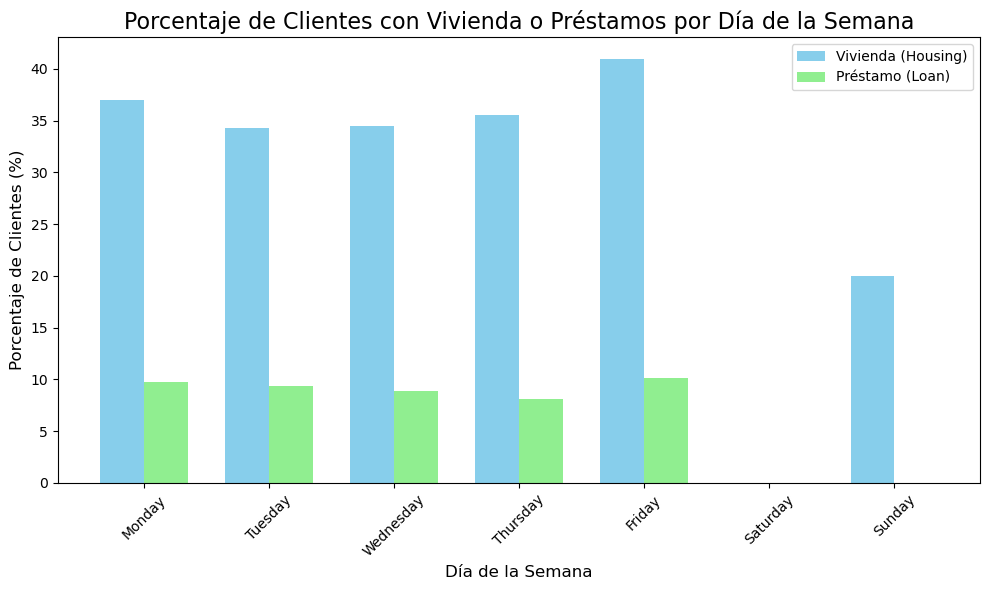

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar por día de la semana y calcular la cantidad de clientes con o sin vivienda
housing_by_weekday = df_BANK_marketing.groupby('weekday').agg(
    total_customers=('id', 'count'),
    housing_customers=('housing', lambda x: (x == 1).sum()),
    loan_customers=('loan', lambda x: (x == 1).sum())
).reset_index()

# Calcular el porcentaje de clientes con vivienda y con préstamos por día de la semana
housing_by_weekday['percent_housing'] = (housing_by_weekday['housing_customers'] / housing_by_weekday['total_customers']) * 100
housing_by_weekday['percent_loan'] = (housing_by_weekday['loan_customers'] / housing_by_weekday['total_customers']) * 100

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
housing_by_weekday['weekday'] = pd.Categorical(housing_by_weekday['weekday'], categories=weekday_order, ordered=True)
housing_by_weekday = housing_by_weekday.sort_values('weekday')

# Crear un gráfico de barras con las columnas separadas
plt.figure(figsize=(10,6))

# Ajustar las posiciones de las barras
x = np.arange(len(housing_by_weekday['weekday']))  # ubicaciones en el eje x
width = 0.35  # ancho de las barras

# Gráfico de barras para el porcentaje de clientes con vivienda (housing)
plt.bar(x - width/2, housing_by_weekday['percent_housing'], width, label='Vivienda (Housing)', color='skyblue')

# Gráfico de barras para el porcentaje de clientes con préstamos (loan)
plt.bar(x + width/2, housing_by_weekday['percent_loan'], width, label='Préstamo (Loan)', color='lightgreen')

# Añadir etiquetas y título
plt.title('Porcentaje de Clientes con Vivienda o Préstamos por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Porcentaje de Clientes (%)', fontsize=12)
plt.xticks(x, housing_by_weekday['weekday'], rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar por nivel educativo y día de la semana
education_by_weekday = df_BANK_marketing.groupby(['weekday', 'education']).agg(
    total_customers=('id', 'count'),
    successful_contacts=('deposit', lambda x: (x == True).sum())  # Asumiendo que 'deposit' es booleano
).reset_index()

# Calcular la tasa de éxito
education_by_weekday['success_rate'] = (education_by_weekday['successful_contacts'] / education_by_weekday['total_customers']) * 100

# Ordenar los días de la semana en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
education_by_weekday['weekday'] = pd.Categorical(education_by_weekday['weekday'], categories=weekday_order, ordered=True)
education_by_weekday = education_by_weekday.sort_values(['weekday', 'education'])

# Mostrar los resultados
print(education_by_weekday)


      weekday  education  total_customers  successful_contacts  success_rate
4      Monday    primary               73                   73         100.0
5      Monday  secondary              362                  362         100.0
6      Monday   tertiary              292                  292         100.0
7      Monday    unknown               39                   39         100.0
16    Tuesday    primary               86                   86         100.0
17    Tuesday  secondary              352                  352         100.0
18    Tuesday   tertiary              293                  293         100.0
19    Tuesday    unknown               40                   40         100.0
20  Wednesday    primary              109                  109         100.0
21  Wednesday  secondary              381                  381         100.0
22  Wednesday   tertiary              311                  311         100.0
23  Wednesday    unknown               45                   45         100.0

In [44]:
import pandas as pd

# Asegúrate de que el DataFrame esté cargado correctamente
# df_BANK_marketing = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre correcto

# Agrupar por mes y día de la semana
month_weekday_data = df_BANK_marketing.groupby(['month', 'weekday']).agg(
    total_customers=('id', 'count'),
    successful_contacts=('deposit', lambda x: (x == True).sum())  # Asumiendo que 'deposit' es booleano
).reset_index()

# Calcular la tasa de éxito
month_weekday_data['success_rate'] = (month_weekday_data['successful_contacts'] / month_weekday_data['total_customers']) * 100

# Ordenar los días de la semana y los meses en el orden correcto
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_weekday_data['weekday'] = pd.Categorical(month_weekday_data['weekday'], categories=weekday_order, ordered=True)
month_weekday_data['month'] = pd.Categorical(month_weekday_data['month'], categories=month_order, ordered=True)

# Ordenar los datos
month_weekday_data = month_weekday_data.sort_values(['month', 'weekday'])

# Mostrar los resultados
print(month_weekday_data)


   month    weekday  total_customers  successful_contacts  success_rate
21   jan     Monday               16                   16         100.0
23   jan    Tuesday                9                    9         100.0
24   jan  Wednesday               24                   24         100.0
22   jan   Thursday               31                   31         100.0
20   jan     Friday               18                   18         100.0
..   ...        ...              ...                  ...           ...
11   dec     Monday               21                   21         100.0
13   dec    Tuesday               12                   12         100.0
14   dec  Wednesday               19                   19         100.0
12   dec   Thursday               19                   19         100.0
10   dec     Friday               12                   12         100.0

[65 rows x 5 columns]
